In [1]:
!pip install qiskit[visualization]
!pip install qiskit-aer
!pip install pylatexenc

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


In [2]:
from qiskit import *
from qiskit.visualization import *

Rappel de l'énigme : Quatre personnes se trouvent en file sur des podiums de taille différentes. Chaque personne se sera vu ses cheveux colorés d'orange ou d'indigo de manière aléatoire. Chaque personne ne voit les cheveux que des personnes qui se trouvent devant elle. Leur mission est qu'ils devinent tous leur propre couleur de cheveux. Chaque personne ne peut dire que indigo ou orange.

Quelle stratégie les participants doivent utiliser pour deviner l'ensemble des couleur avec la plus haute probabilité ?

La meilleure stratégie étant celle de la parité, les quatre participants se sont consulté afin d'appliquer au mieux leur stratégie. La première personne à jouer étant celle qui voit le plus de chevelures, si celle-ci voit un nombre pair d'indigo, alors sa réponse sera "orange" et à l'inverse elle sera "indigo". Cela permetra donc aux personnes suivantes de determiner leur propre chevelure en se basant sur les réponses précédentes.

Création du circuit à 8 qubit
Les Qubits "q0" à "q3" représentent les quatre participants => Alice, Bob, Charlie et Dahlia
Les Qubits "q4" à "q7" représentent leur raisonnement

In [6]:
circ = QuantumCircuit(8)

/home/9eebf5fd-8a1e-4f6a-b68a-cf559ae366a8/.local/lib/python3.11/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


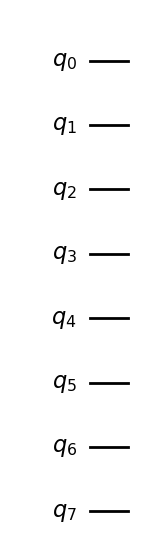

In [7]:
 circ.draw("mpl")

Ajoutons des porte Hadamard sur les qubits des quatre joueurs afin de représenter toutes les combinaisons de chevelures

In [9]:
circ.h(0)
circ.h(1)
circ.h(2)
circ.h(3)

Une barrière pour séparer

In [11]:
circ.barrier(0,1,2,3,4,5,6,7)

Alice voit les trois chevelures devant elle et compte voit la parité de chevelures indigo

In [13]:
circ.cx(1, 4)
circ.cx(2, 4)
circ.cx(3, 4)

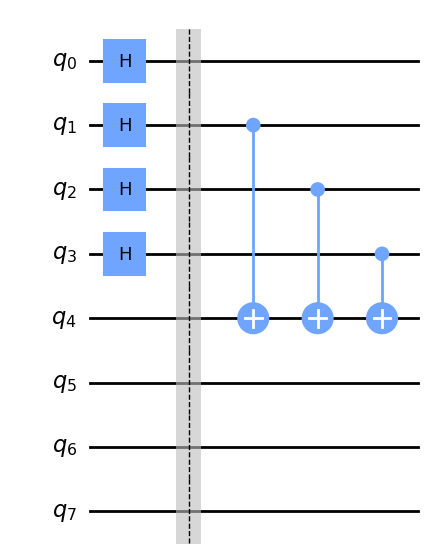

In [14]:
 circ.draw("mpl")

Une barrière pour séparer

In [16]:
circ.barrier(0,1,2,3,4,5,6,7)

Les trois personnes devant Alice prennent note de sa réponse, nous pouvons le représenter en ajoutant des qubit sur les lignes de raisonnement

In [18]:
circ.cx(4, 5)
circ.cx(4, 6)
circ.cx(4, 7)

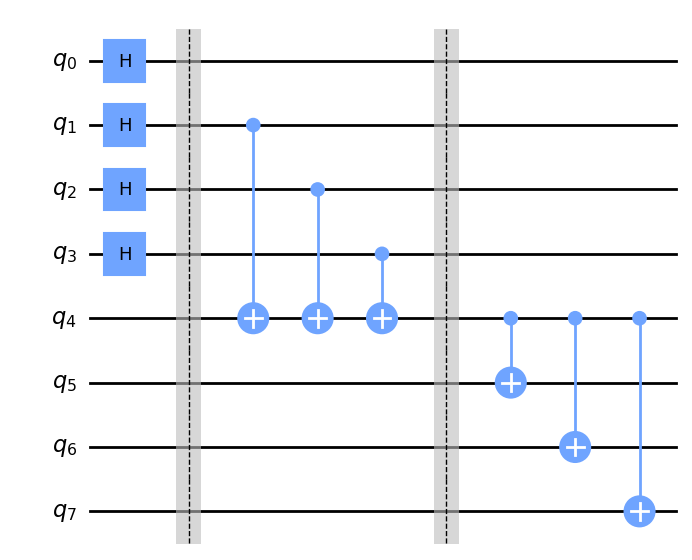

In [19]:
circ.draw("mpl")

Une barrière pour séparer

In [21]:
circ.barrier(0,1,2,3,4,5,6,7)

Nous posons le raisonnement de Bob, se basant sur la réponse de Alice et des chevelures devant lui. Il peut deviner la couleur de sa propre chevelure

In [23]:
circ.cx(2,5)
circ.cx(3,5)
circ.draw("mpl")
circ.barrier()

Les deux participants restant prennent en note la réponse de Bob

In [25]:
circ.cx(5,6)
circ.cx(5,7)
circ.barrier()

Avec cela, Charlie peut annoncer sa parité de chevelure

In [27]:
circ.cx(3,6)
circ.barrier()

A partir d'ici, Dahlia peut annoncer sa propre chevelure avec toute confiance

In [29]:
circ.cx(6,7)

On mesure et on affiche

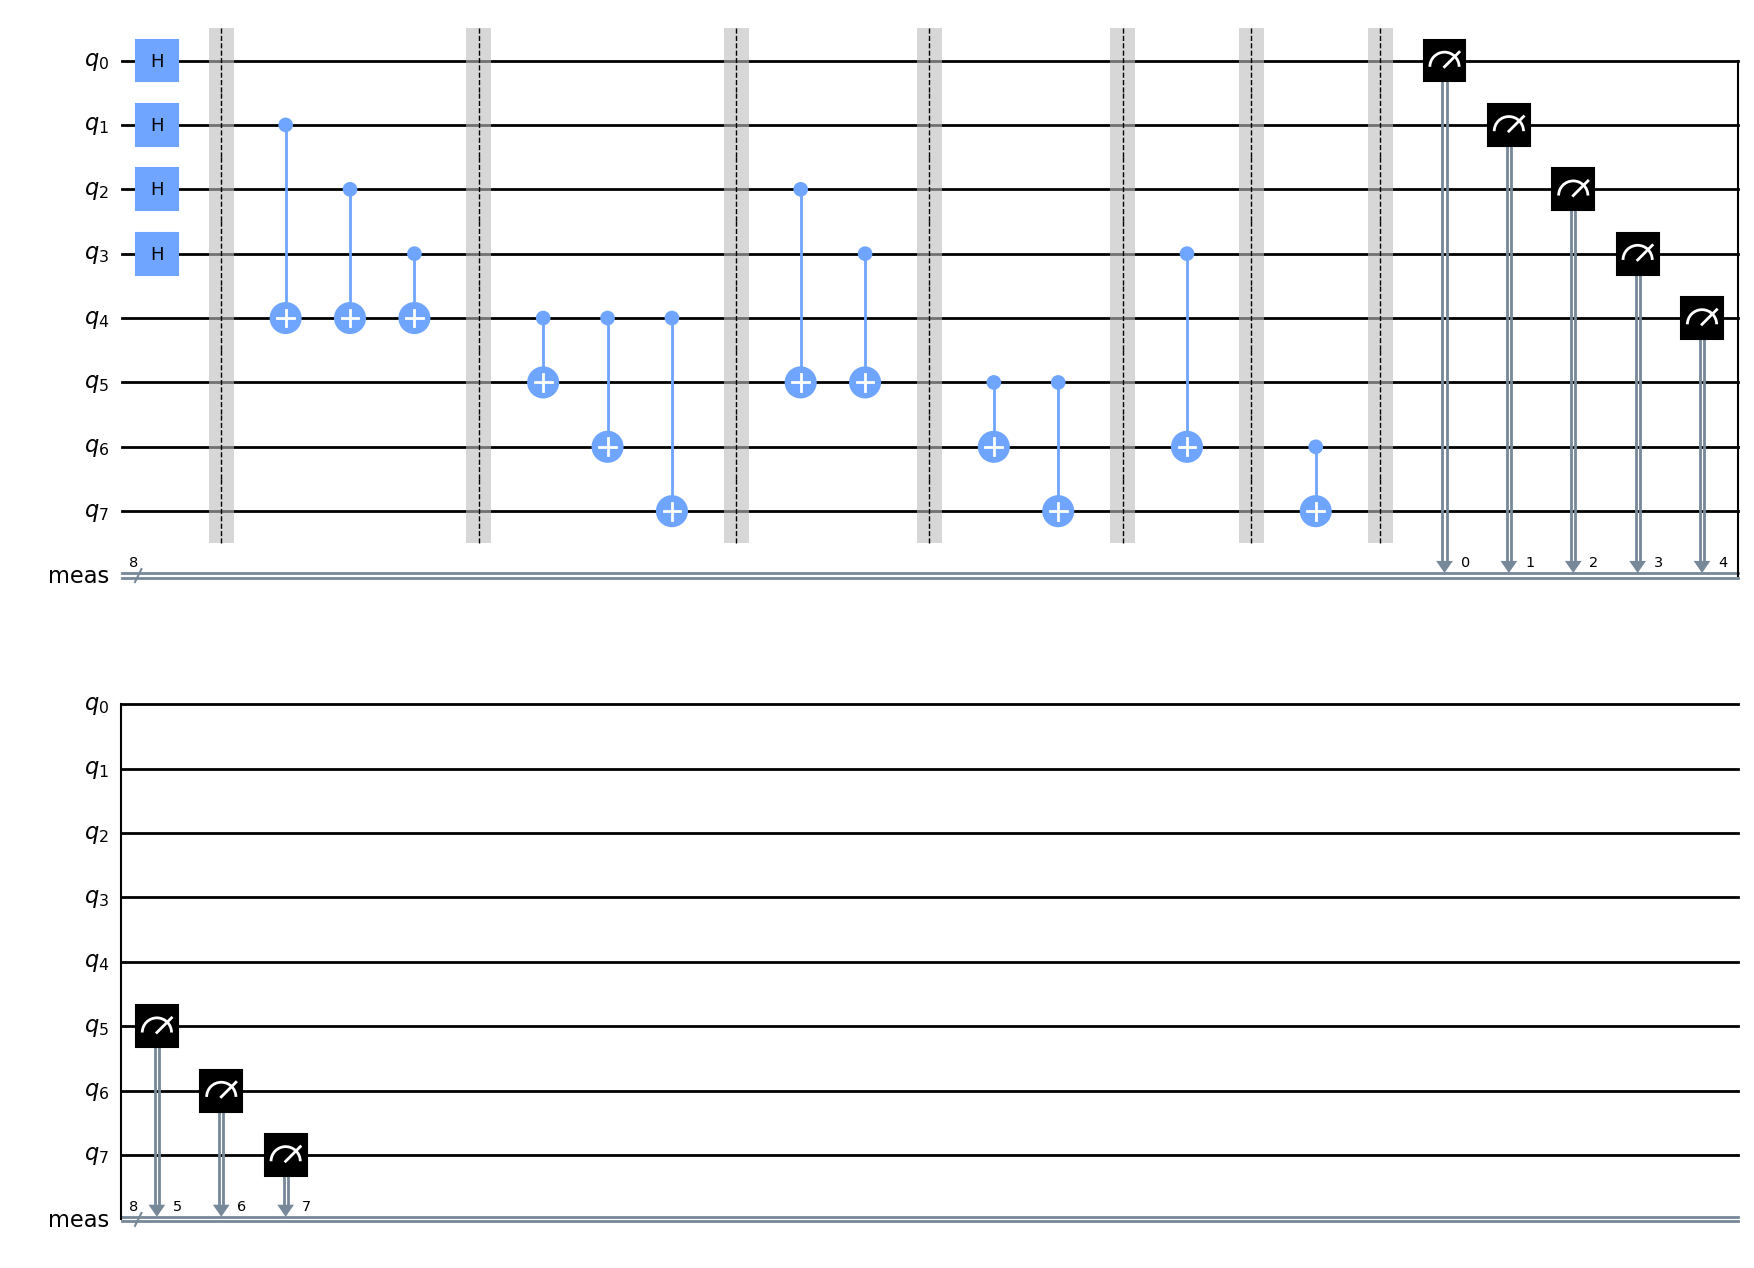

In [31]:
circ.measure_all()
circ.draw("mpl")

On peut donc calculer avec un simulateur quantique

In [33]:
backend = Aer.get_backend('statevector_simulator') 
job = backend.run(circ)
result = job.result()

Affichage sous forme d'histogramme avec les probabilité pour chaque possibilité

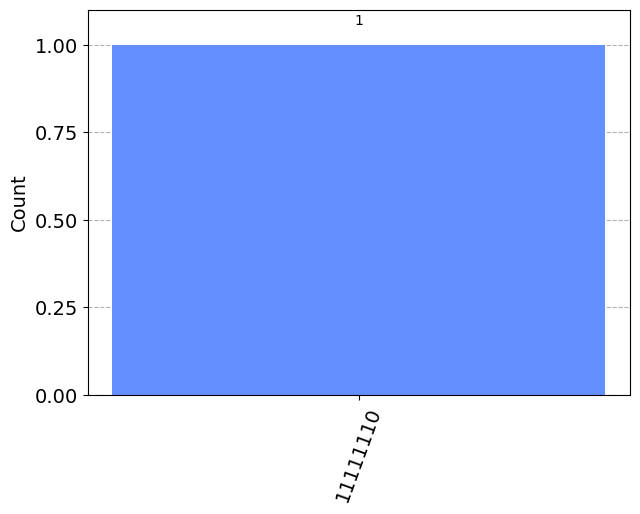

In [35]:
counts = result.get_counts()
plot_histogram(counts)